In [12]:
import matplotlib.pyplot as plt
import IPython
%matplotlib inline

In [13]:
import speech as sp
import numpy as np
# Parameters 
p = 10 #Order of the all pole filter
frame_size = 400 # Window size
iterations = 5 # Number of iterations of the Wiener Filter

# Preparing the sample
y_clean, sr = sp.data.load('../samples/arctic_b0443.wav')
# For now : choose the SNR (Db) and add corresponding noise to the signal
SNR = 60
y = sp.data.add_noise(y_clean,SNR)

# Get the list of frames for the STFT filtering
list_frames,y_padded,w_a,w_s = sp.data.frame_split(y,frame_size)
n_frames = len(list_frames)

s = np.zeros(y_padded.shape)
for frame in range(n_frames):
    start,end = list_frames[frame]
    s[start:end] = w_s*sp.process.denoise_frame(w_a*y_padded[start:end],p,sr,iterations)


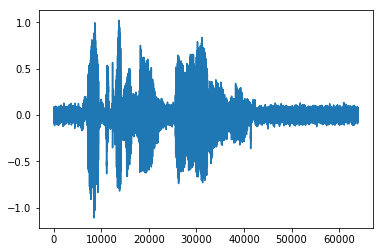

In [14]:
# Plot and play the noisy signal
plt.plot(y)
IPython.display.Audio(y,rate=sr)

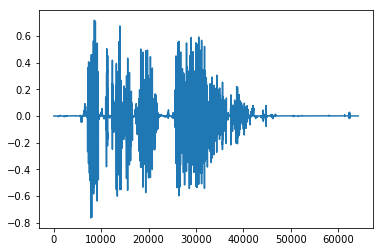

In [15]:
#Plot and play the denoised signal
plt.plot(s)
IPython.display.Audio(s,rate=sr)

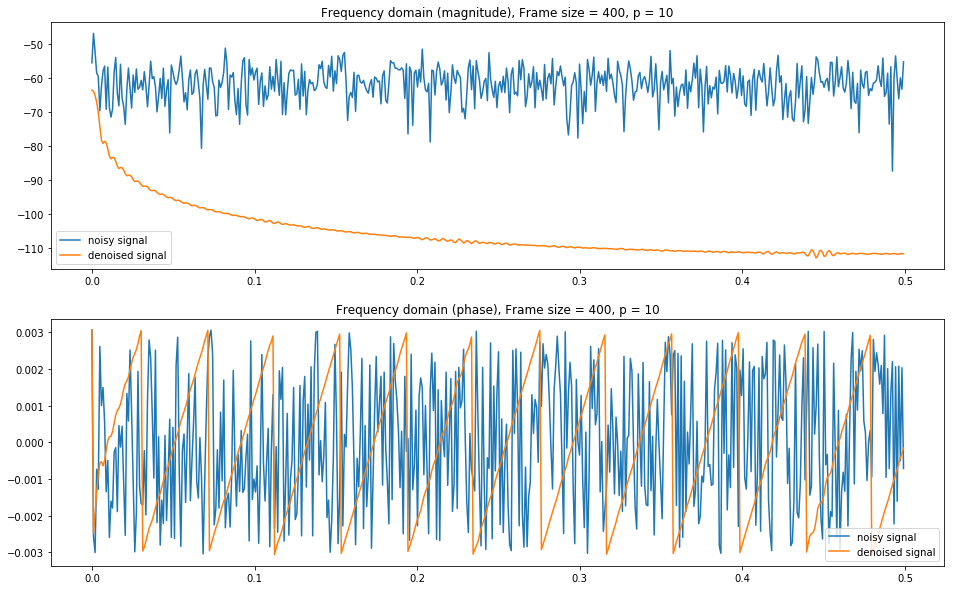

In [16]:
N = 1024
S = np.fft.fftshift(np.fft.fft(s, N))
Y = np.fft.fftshift(np.fft.fft(y, N))
freq = np.fft.fftshift(np.fft.fftfreq(N))
ind = [ind for ind, values in enumerate(freq) if values >= 0]

fig, axes = plt.subplots(2, 1, figsize=(16, 10))
# Plot spectrum (Magnitude)
axes[0].plot(freq[ind], 20*np.log10(np.abs(Y[ind])/N),label='noisy signal')
axes[0].plot(freq[ind], 20*np.log10(np.abs(S[ind])/N),label='denoised signal')
axes[0].legend()
axes[0].set_title('Frequency domain (magnitude), Frame size = {}, p = {}'.format(frame_size,p))

# Plot spectrum (Phase)
axes[1].plot(freq[ind], np.angle(Y[ind])/N,label='noisy signal')
axes[1].plot(freq[ind], np.angle(S[ind])/N,label='denoised signal')
axes[1].legend()
axes[1].set_title('Frequency domain (phase), Frame size = {}, p = {}'.format(frame_size,p))

plt.show()